In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## **Data Setup and Preview**

In [4]:
data_path =  Path.home()/'notebooks/programming/data/watch_bot'
csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/file_attribs.csv'

In [5]:
df = pd.read_csv(csv_path)
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility':'int'})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 1  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 2  nomos_1/nomos/_without_model/nomos_@_the_loupe...                0
 3  nomos_1/nomos/_without_model/nomos_beta_11156_...                1
 4  nomos_1/nomos/_without_model/nomos_beta_11156_...                1,
 name               object
 dial_visibility     int64
 dtype: object)

# **Get Prediction**

## **Single Image**

In [6]:
learn = load_learner(data_path)

tensor([8.2152e-09, 1.0000e+00])


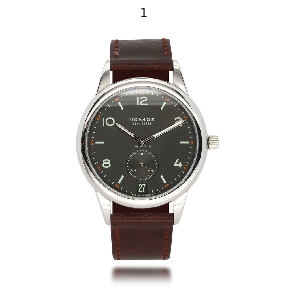

In [7]:
img_path = data_path/df.iloc[0]['name']
img = open_image(img_path)
pred_class, pred_idx, outputs = learn.predict(img)
img.show(figsize=(5,5), title=str(pred_class))
print(outputs)

## **Larger Dataset**

In [8]:
learn = load_learner(data_path, test=ImageList.from_df(df, data_path))
preds, y = learn.get_preds(ds_type=DatasetType.Test)
preds[:5]

tensor([[8.2153e-09, 1.0000e+00],
        [4.6110e-09, 1.0000e+00],
        [1.0000e+00, 1.2796e-07],
        [1.0481e-05, 9.9999e-01],
        [5.4813e-07, 1.0000e+00]])